# Kaggle Customer Satisfaction (Google Drive Mount)
https://www.kaggle.com/c/santander-customer-satisfaction
<br>
<br>
## Data Information
* Kaggle_Customer_Satisfaction.csv (76,020 * 371)
* TARGET : '0' (만족), '1' (불만)
* Metric : 'F1-Score', 'pos_lab' = 1

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Google Drive Mount
* 'Kaggle_Customer_Satisfaction.zip' 파일을 구글드라이브에 업로드 후 진행

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 마운트 결과 확인

In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'

-rw------- 1 root root 4240457 Mar 15 04:04 '/content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip'


# II. Data Preprocessing

> ## 1) Unzip 'Kaggle_Customer_Satisfaction.zip'

* Colab 파일시스템에 'Kaggle_Customer_Satisfaction.csv' 파일 생성

In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Kaggle_Customer_Satisfaction.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Kaggle_Customer_Satisfaction.zip
  inflating: Kaggle_Customer_Satisfaction.csv  


* Kaggle_Customer_Satisfaction.csv 파일 확인

In [5]:
!ls -l

total 57980
drwx------ 5 root root     4096 Mar 15 08:17 drive
-rw-r--r-- 1 root root 59362806 Dec 11  2019 Kaggle_Customer_Satisfaction.csv
drwxr-xr-x 1 root root     4096 Mar  5 14:37 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
import pandas as pd

DF = pd.read_csv('Kaggle_Customer_Satisfaction.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
DF.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


* '0' (만족) TARGET과 '1' (불만) TARGET 개수

In [8]:
DF.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

* '0' (만족) TARGET과 '1' (불만) TARGET 비율

In [9]:
(DF.TARGET.value_counts() / DF.shape[0]) * 100

0    96.043147
1     3.956853
Name: TARGET, dtype: float64

> ## 3) 'var3' 이상치 전처리

In [10]:
DF.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

* 이상치 '-999999'를 최빈값 '2'로 대체

In [11]:
DF['var3'].replace(-999999, 2, inplace = True)

* 'ID' 컬럼 삭제

In [12]:
DF.drop('ID', axis = 1 , inplace = True)

> ## 5) train_test_split

* X (Input), y (Output) 지정

In [13]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((76020, 369), (76020,))

> ### (1) Without 'stratify'

In [14]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 불균형

In [15]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.081858
1     3.918142
Name: TARGET, dtype: float64
Test_Data : 
 0    95.952819
1     4.047181
Name: TARGET, dtype: float64


> ### (2) With 'Stratify'

In [16]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

* Train_Data와 Test_Data의 1 (부정) 비율이 균형

In [17]:
print('Train_Data :','\n', (y_train.value_counts() / y_train.shape[0]) * 100)
print('Test_Data :','\n', (y_test.value_counts() / y_test.shape[0]) * 100)

Train_Data : 
 0    96.042395
1     3.957605
Name: TARGET, dtype: float64
Test_Data : 
 0    96.0449
1     3.9551
Name: TARGET, dtype: float64


# III. EDA

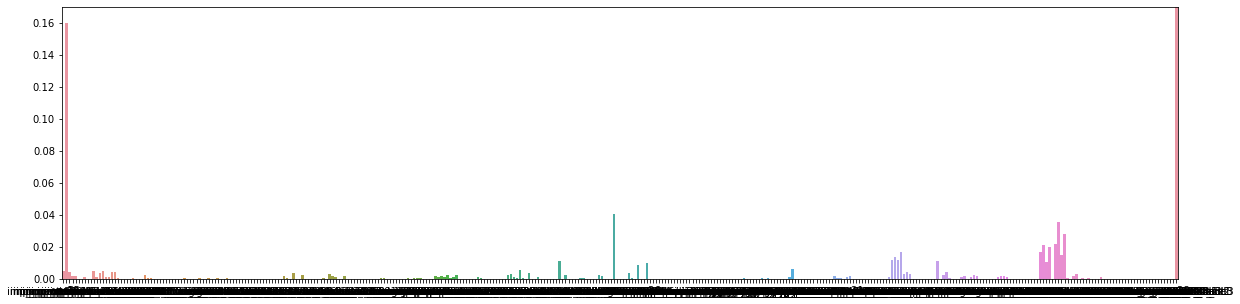

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.barplot(X.columns, model.feature_importances_)
plt.ylim(0, 0.17)
plt.show()

In [ ]:
DF.corr()

In [ ]:
sns.pairplot(hue='SalePrice', data=DF_OHE)
plt.show()

# IV. Modeling

## 1, Decision Tree

### 모델링

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score
from sklearn.model_selection import train_test_split

def decisionTree(model, X, y, md=3, visualFeature = False):
  X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.3, random_state=2045)

  DT = DecisionTreeClassifier(criterion='entropy', max_depth=md,  random_state=2045)
  DT.fit(X_train, y_train)

  DT_rc = recall_score(y_test, DT.predict(X_test), pos_label=1)
  DT_f1 = f1_score(y_test, DT.predict(X_test), pos_label=1)

  if visualFeature:
    plt.figure(figsize = (9, 6))
    sns.barplot(DT.feature_importances_, X.columns)
    plt.title('Feature Importance')
    plt.show()

  return {'model':model, 'max_depth':md, 'recall_score':DT_rc, 'f1_score':DT_f1}

### Hyperparameter(max_depth)

In [ ]:
DF_total = pd.DataFrame(columns=['model', 'alpha',  'n_estimators', 'learning_rate', 'max_features', 'max_depth', 'recall_score','f1_score'])

In [ ]:

%%time
DT_score = pd.DataFrame(columns = ['model','max_depth','recall_score','f1_score'])
index = 1
a = [30, 50, 80, 100, 300, 500]
for i in a :
  model = 'DT-'+str(index)
  index += 1
  res = decisionTree(model, X, y,md=i)
  print(res)
  DT_score = DT_score.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

In [ ]:
DT_score.sort_values(by='f1_score', ascending=False).head(1)

## 2, Random Forest

### 모델링

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def randomForest(model, X, y, n_est=100, mf='auto', md=None, visualFeature = False):
  X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.3, random_state=2045)

  RT = RandomForestClassifier(n_estimators=n_est, max_depth=md, max_features=mf, random_state=2045, criterion='entropy', n_jobs=-1)
  RT.fit(X_train, y_train)

  RT_rc = recall_score(y_test, RT.predict(X_test), pos_label=1)
  RT_f1 = f1_score(y_test, RT.predict(X_test), pos_label=1)

  if visualFeature:
      plt.figure(figsize = (25, 6))
      sns.barplot(X.columns, RT.feature_importances_ )
      plt.title('Feature Importance')
      plt.show()
  return {'model':model, 'n_est':n_est, 'max_depth':md, 'max_features':mf, 'recall_score':RT_rc, 'f1_score':RT_f1}

### Hyperparameter(n_est/ max_depth)

In [ ]:
# n_est
%%time
RT_score = pd.DataFrame(columns=['model','n_est','max_depth','max_features','recall_score','f1_score'])
est = [300,500,700,1000]
depth = [50, 100, 300, 500]

index = 1

for i in est:
  for j in depth:
    model = 'RT-'+str(index)
    index += 1
    res = randomForest(model, X, y, n_est=i, md=j)
    print(res)
    RT_score = RT_score.append(res, ignore_index=True)
    DF_total = DF_total.append(res, ignore_index=True)

In [ ]:
RT_score.sort_values(by='f1_score', ascending=False)

### Hyperparameter(max_features)

In [ ]:
%%time


for i in range(5, 360, 10) :
  model = 'RT-'+str(index)
  index += 1
  res = randomForest(model, X, y, n_est=500, md=100 , mf=i)
  print(res)
  RT_score =RT_score.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

In [ ]:
RT_score.sort_values(by='f1_score', ascending=False).head(5)

## 3, LigntGBMC

### 모델링

In [ ]:
from lightgbm import LGBMClassifier

def lightGBM(model, X, y, n_est=300, md=None,lr=0.5):
  X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size=0.3, random_state=2045)

  LGBMC = LGBMClassifier(n_estimators=n_est, max_depth=md, learning_rate=lr, reg_lambda=0.2, n_jobs=-1, random_state=2045)
  LGBMC.fit(X_train, y_train)

  LGBMC_rc = recall_score(y_test, LGBMC.predict(X_test), pos_label=1)
  LGBMC_f1 = f1_score(y_test, LGBMC.predict(X_test), pos_label=1)

  return {'model':model, 'n_estimators':n_est, 'max_depth':md, 'learning_rate':lr, 'recall_score':LGBMC_rc, 'f1_score':LGBMC_f1}

### Hyperparameter(n_est/max_depth)

In [ ]:
LGBMC_score = pd.DataFrame(columns=['model','n_estimators','max_depth','learning_rate','recall_score','f1_score'])

est = [300,500,700,1000]
depth = [50, 100, 300, 500]

index = 1

for i in est:
  for j in depth:
    model = 'LGBMC-'+str(index)
    index += 1
    res = lightGBM(model, X, y, n_est=i, md=j)
    print(res)
    LGBMC_score = LGBMC_score.append(res, ignore_index=True)
    DF_total = DF_total.append(res, ignore_index=True)

### Hyperparameter(learning_rate)

In [ ]:
a = [0.005, 0.05, 0.1, 0.3]

for i in a : 
  model = 'LGBMC-'+str(index)
  index += 1
  res = lightGBM(model, X, y, n_est=1000 , md=50, lr=i)
  print(res)
  LGBMC_score = LGBMC_score.append(res, ignore_index=True)
  DF_total = DF_total.append(res, ignore_index=True)

In [ ]:
LGBMC_score.sort_values(by='f1_score', ascending=False).head(3)

# V. rmse 비교

In [ ]:
DF_total_sort = DF_total.sort_values(by='f1_score', ascending=False).head(15)
DF_total_sort

In [ ]:
sns.barplot(DF_total_sort.model, DF_total_sort.f1_score)
plt.ylim(0.06, 0.15)
plt.show

In [ ]:
res = decisionTree('DT', X, y, md=80, visualFeature =True)
DF_total = DF_total.append(res, ignore_index=True)

# 
# 
# 
# The End
# 
# 
# 